#Plate Number Classification

#Import Packages

Import all our packages

In [5]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os, cv2, itertools
import matplotlib.pyplot as plt 
%matplotlib inline

Using TensorFlow backend.


Mount google drive on colab so we can be able to connect and use files stored on google drive.

In [10]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


#Prepare the Data

1. Here we set the path for both image folders directory.
2. Set the Rows and Cols to 64 each
3. Set the channel to 3 because we are dealing with RGB images

In [0]:
plate_number_dir = '/gdrive/My Drive/ML/Plate vs nonplates/data/Plate_number/' #'./plate_numbers/'
negative_images_dir = '/gdrive/My Drive/ML/Plate vs nonplates/data/Negative_images/' #'./negative_images/'
ROWS = 64
COLS = 64
CHANNELS = 3

Collect all images in a list

In [0]:
plate_numbers_img = [plate_number_dir+i for i in os.listdir(plate_number_dir)]
negative_images_img = [negative_images_dir+i for i in os.listdir(negative_images_dir)]

A function to read and resize all the images

In [0]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    resized_img = cv2.resize(img, (ROWS, COLS), interpolation = cv2.INTER_AREA)
    return resized_img

A function to prepare the images for use in our model

In [0]:
def prep_data(images):
    m = len(images)
    n_x = ROWS*COLS*CHANNELS
    X = np.ndarray((n_x,m), dtype = np.uint8)
    y = np.zeros((1,m))
    print("X.shape is {}".format(X.shape))
    for i,image_file in enumerate(images):

        image = read_image(image_file)
        print(i, 'done')
        X[:,i] = np.squeeze(image.reshape((n_x,1)))

        if '-' in image_file.lower():
            y[0,i] = 1

        elif 'glass' in image_file.lower():
          y[0,i] = 0

          
        if i%100 == 0 :
            print("Proceed {} of {}".format(i, m))

    return X,y

Calling the above function and passing it the two image list

In [14]:
plate_img, negative_img = prep_data(plate_numbers_img + negative_images_img)

X.shape is (12288, 104)
0 done
Proceed 0 of 104
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
51 done
52 done
53 done
54 done
55 done
56 done
57 done
58 done
59 done
60 done
61 done
62 done
63 done
64 done
65 done
66 done
67 done
68 done
69 done
70 done
71 done
72 done
73 done
74 done
75 done
76 done
77 done
78 done
79 done
80 done
81 done
82 done
83 done
84 done
85 done
86 done
87 done
88 done
89 done
90 done
91 done
92 done
93 done
94 done
95 done
96 done
97 done
98 done
99 done
100 done
Proceed 100 of 104
101 done
102 done
103 done


Setting the classes, 1 for Plate_Numbers and 0 for Negative Images

In [0]:
classes = {0: 'Negative_Image',         
          1: 'Plate_Number'}

A function for displaying images

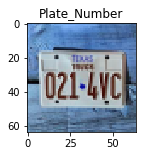

In [16]:
def show_images(X, y, idx) :
        image = X[idx]
        image = image.reshape((ROWS, COLS, CHANNELS))
        plt.figure(figsize=(4,2))
        plt.imshow(image),
        plt.title(classes[y[idx,0]])
        plt.show()
show_images(plate_img.T, negative_img.T, 0)

#Build Model

#Logistic Regression Model

Here we import logitsticRegressionCV from sklearn.

* Initialise the LRCV
* Fit our data into the model
* print the model accuracy on our training set

In [17]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV()
plate_img_lr, neg_img_lr = plate_img.T, negative_img.T.ravel()


clf.fit(plate_img_lr, neg_img_lr)
print("Model accuracy: {:.2f}%".format(clf.score(plate_img_lr, neg_img_lr)*100))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Model accuracy: 100.00%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


A function to show image prediction

In [0]:
def show_image_prediction(X, idx, model) :
    image = X[idx].reshape(1,-1)
    image_class = classes[model.predict(image).item()]
    image = image.reshape((ROWS, COLS, CHANNELS))
    plt.figure(figsize = (4,2))
    plt.imshow(image)
    plt.title("Test {} : I think this is {}".format(idx, image_class))
    
    plt.show()

Since we don't have a test set, we predict our model on our training set.

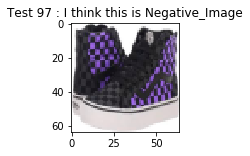

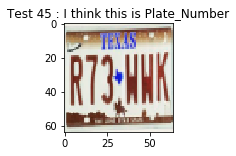

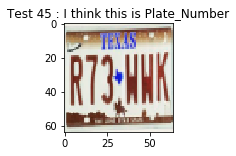

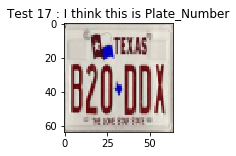

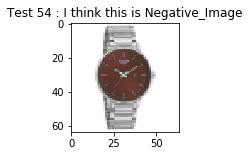

In [20]:
plate_img_lr, neg_img_lr = plate_img.T, negative_img.T

for i in np.random.randint(0, len(plate_img_lr), 5) :
    show_image_prediction(plate_img_lr, i, clf)

#KNN Classification

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(plate_img_lr, neg_img_lr)

print("Model accuracy: {:.2f}%".format(knn.score(plate_img_lr, neg_img_lr)*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Model accuracy: 87.50%


From above score we can see that KNN performs poorly compared to Logistic Regression

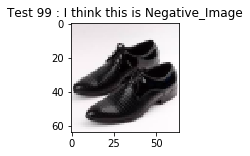

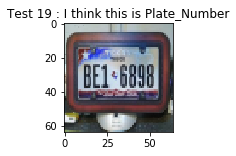

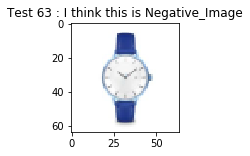

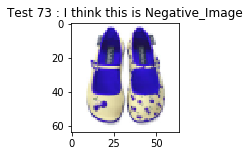

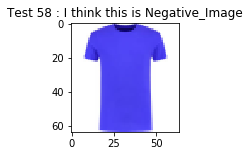

In [22]:
plate_img_lr, neg_img_lr = plate_img.T, negative_img.T

for i in np.random.randint(0, len(plate_img_lr), 5) :
    show_image_prediction(plate_img_lr, i, knn)

#Radius Nearest Neighbour

In [23]:
from sklearn.neighbors import RadiusNeighborsClassifier

rnc = RadiusNeighborsClassifier()
rnc.fit(plate_img_lr, neg_img_lr)

print("Model accuracy: {:.2f}%".format(rnc.score(plate_img_lr, neg_img_lr)*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Model accuracy: 100.00%


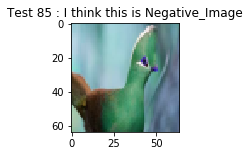

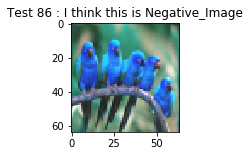

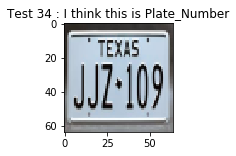

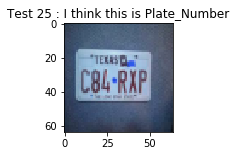

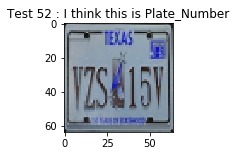

In [24]:
plate_img_lr, neg_img_lr = plate_img.T, negative_img.T

for i in np.random.randint(0, len(plate_img_lr), 5) :
    show_image_prediction(plate_img_lr, i, rnc)